DISCLARIMER

The idea of these notebooks is not to explain what is in the Bishop or to add anything. It is simply to give a guide so that the reader can replicate the examples and understand in a practical way what he is reading. In any case, over time I will improve them so that they have more and more information and are self-contained. Anyway, it is best to use them as an addition while reading the Bishop.


In this notebook I will show how to approximate the functions given by Bishop in figure 5.3. I will use the Python Library Keras. Although the idea of this notebooks is to implement everything from scratch I will leave the Neural Net implementation for following notebooks.

The structure of my Neural Net might not be the same as the Bishop's one, but the results will be *similar*

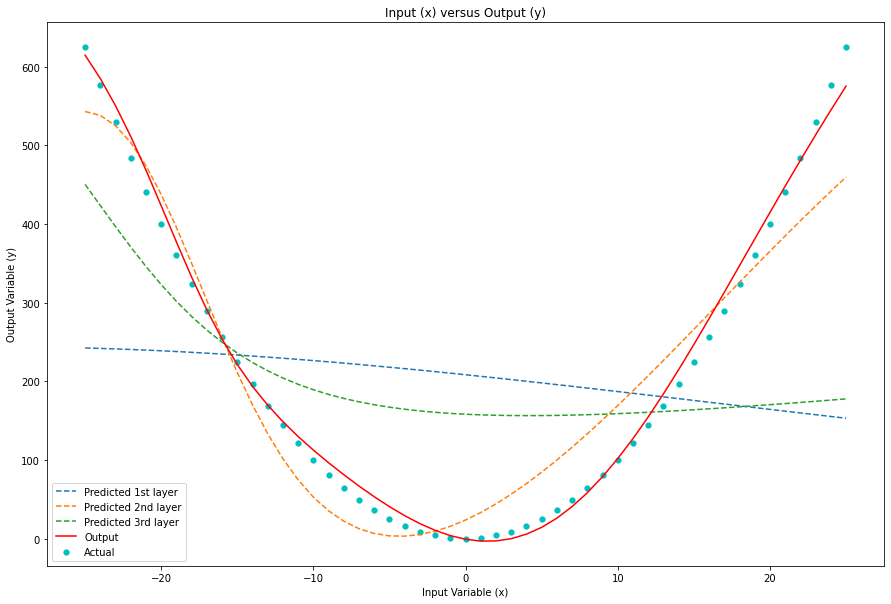

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from numpy import asarray
import matplotlib.pyplot as plt
import math as mt
# define the dataset
x = asarray([i for i in range(-25,26)])
y = asarray([i**2 for i in x])
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
x = x.reshape((51,1))
y = y.reshape((51,1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)


model_1 = Sequential()
model_1.add(keras.layers.Dense(2, input_dim=1, activation='tanh', kernel_initializer='he_uniform'))
model_1.add(keras.layers.Dense(1))
model_1.compile(loss='mse', optimizer='adam')
model_1.fit(x, y, epochs=600, batch_size=10, verbose=0)
yhat_1 = model_1.predict(x)

model_2 = Sequential()
model_2.add(keras.layers.Dense(2, input_dim=1, activation='tanh', kernel_initializer='he_uniform'))
model_2.add(keras.layers.Dense(4, activation='tanh', kernel_initializer='he_uniform'))
model_2.add(keras.layers.Dense(1))
model_2.compile(loss='mse', optimizer='adam')
model_2.fit(x, y, epochs=600, batch_size=10, verbose=0)
yhat_2 = model_2.predict(x)

model_3 = Sequential()
model_3.add(keras.layers.Dense(2, input_dim=1, activation='tanh', kernel_initializer='he_uniform'))
model_3.add(keras.layers.Dense(4, activation='tanh', kernel_initializer='he_uniform'))
model_3.add(keras.layers.Dense(8, activation='tanh', kernel_initializer='he_uniform'))
model_3.add(keras.layers.Dense(1))
model_3.compile(loss='mse', optimizer='adam')
model_3.fit(x, y, epochs=600, batch_size=10, verbose=0)
yhat_3 = model_3.predict(x)

model_4 = Sequential()
model_4.add(keras.layers.Dense(2, input_dim=1, activation='tanh', kernel_initializer='he_uniform'))
model_4.add(keras.layers.Dense(4, activation='tanh', kernel_initializer='he_uniform'))
model_4.add(keras.layers.Dense(8, activation='tanh', kernel_initializer='he_uniform'))
model_4.add(keras.layers.Dense(16, activation='tanh', kernel_initializer='he_uniform'))
model_4.add(keras.layers.Dense(1))
model_4.compile(loss='mse', optimizer='adam')
model_4.fit(x, y, epochs=600, batch_size=10, verbose=0)
yhat_4 = model_4.predict(x)

x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot_1 = scale_y.inverse_transform(yhat_1)
yhat_plot_2 = scale_y.inverse_transform(yhat_2)
yhat_plot_3 = scale_y.inverse_transform(yhat_3)
yhat_plot_4 = scale_y.inverse_transform(yhat_4)
fig = plt.figure(figsize=(15,10))
plt.scatter(x_plot,y_plot,c='c',linewidths=0.2 ,label='Actual')
plt.plot(x_plot,yhat_plot_1,'--', label='Predicted 1st layer ')
plt.plot(x_plot,yhat_plot_2,'--', label='Predicted 2nd layer')
plt.plot(x_plot,yhat_plot_3,'--' ,label='Predicted 3rd layer')
plt.plot(x_plot,yhat_plot_4,'r',label='Output')

plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()